In [ ]:
!rm -rf DL_Data_sets/
!git clone --branch images https://github.com/octavio-navarro/DL_Data_sets.git
!uname -a

Cloning into 'DL_Data_sets'...
remote: Enumerating objects: 64969, done.
remote: Counting objects: 100% (500/500), done.
remote: Compressing objects: 100% (491/491), done.
remote: Total 64969 (delta 13), reused 493 (delta 9), pack-reused 64469 (from 1)
Receiving objects: 100% (64969/64969), 1.54 GiB | 32.58 MiB/s, done.
Resolving deltas: 100% (136/136), done.
Linux 8b68775e090b 6.6.97+ #1 SMP PREEMPT_DYNAMIC Sat Sep  6 09:54:41 UTC 2025 x86_64 x86_64 x86_64 GNU/Linux


# Computer vision

The goal of computer vision is to understand the story unfolding in a picture. As humans, this is quite simple. But for computers, the task is extremely difficult.

Computer vision is a field that enables machines to interpret and understand the visual world. By using algorithms and models, computer vision allows computers to automatically process, analyze, and derive meaningful insights from images, videos, and other visual inputs. The goal is to replicate human vision capabilities, allowing computers to identify and interpret visual objects, scenes, and activities.

![Applications_1](https://cdn.prod.website-files.com/614c82ed388d53640613982e/6475f0e3ba6ef9bc2836272b_image%20classification%20classification%20localization%20detection.webp)

![Applications_2](https://images.prismic.io/encord/687a497d-e323-4772-8cd4-4bd67b9dd9a5_image7.png?auto=compress,format)

There are now many vision systems in routine industrial use: cameras inspect mechanical parts to check size, food is inspected for quality and images used in as- tronomy benefit from computer vision techniques. Forensic studies and biometrics (ways to recognise people) using computer vision include automatic face recognition.

There are many different image sources. In medical studies, MRI is good for imaging soft tissue but does not reveal the bone structure; this can be achieved by using computerised tomography which is better at imaging bone, as opposed to soft tissue. Remotely sensed images can be derived from infrared (thermal) sensors or synthetic-aperture radar, rather than by cameras. Spatial information can be provided by two-dimensional arrays of sensors, including sonar arrays. There are perhaps more varieties of sources of spatial data in medical studies than in any other area. But computer vision techniques are used to analyse any form of data, not just the images from cameras.

![MRI](https://case.edu/med/neurology/NR/mri%20slices%20new.jpg)

[![Computer vision](https://img.youtube.com/vi/OnTgbN3uXvw/0.jpg)](https://www.youtube.com/watch?v=OnTgbN3uXvw)

## Applications of Computer Vision:

1. Autonomous Vehicles:

Computer vision is crucial for self-driving cars, enabling them to recognize and respond to road signs, pedestrians, other vehicles, and obstacles. Real-time object detection and tracking are key for safe navigation.

2. Medical Imaging:

In healthcare, computer vision is used for tasks like diagnosing diseases from medical images (e.g., X-rays, MRIs) and detecting abnormalities like tumors or fractures, helping doctors make quicker and more accurate diagnoses.

3. Retail and E-commerce:

Computer vision powers visual search and product recognition in online shopping platforms, allowing users to search for products based on images. It is also used in customer behavior analysis and inventory management in stores.

4. Robotics:

Vision-guided robots can recognize and manipulate objects, navigate through environments, and interact with humans. This is critical for applications in manufacturing, logistics, and personal assistance.

5. Agriculture:

Computer vision helps in monitoring crops, detecting plant diseases, analyzing soil health, and even guiding autonomous farm equipment to perform tasks like harvesting.

6. Cybersecurity:

Computer vision enhances cybersecurity by enabling real-time threat detection, improving biometric security with facial recognition, and identifying phishing and malware through visual analysis. It helps detect deepfakes, prevents visual hacking, and secures IoT devices from tampering. Integrated with AI, it provides adaptive and proactive defenses.






# Computer vision pipeline

A computer vision pipeline is a series of steps that most computer vision applications will go through. Many vision applications start off by acquiring images and data, then processing that data, performing some analysis and recognition steps, then finally performing an action. The general pipeline and a specific example of a pipeline applied to facial expression recognition is pictured below.

![](https://raw.githubusercontent.com/octavio-navarro/Computer-Vision/main/Notebooks/images/face_recognition_pipeline.png)

### Standardizing Data

Pre-processing images is all about standardizing input images so that you can move further along the pipeline and analyze images in the same way. In machine learning tasks, the pre-processing step is often one of the most important. For example, for a traffic sign classification task:

If the images are different sizes, or even cropped differently, then this counting tactic will likely fail. So, it's important to pre-process these images so that they are standardized before they move along the pipeline. In the example below, you can see that the images are pre-processed into a standard square size.

The algorithm counts up the number of red pixels in a given image and if there are enough of them, it classifies an image as a stop sign. In this example, we are just extracting a color feature and skipping over selecting an area of interest (we are looking at the whole image). In practice, you'll often see a classification pipeline that looks like this:

![Correct Traffic classification](https://raw.githubusercontent.com/octavio-navarro/Computer-Vision/main/Notebooks/images/traffic_sign_classification_2.png)

# Images as Grids of Pixels

Every image consists of a set of pixels. Pixels are the raw building blocks of an image. Normally, we think of a pixel as the “color” or the “intensity” of light that appears in a given place in our image.

If we think of an image as a grid, each square in the grid contains a single pixel.

For example, let’s pretend we have an image with a resolution of 500 × 300. This means that our image is repre-sented as a grid of pixels, with 500 rows and 300 columns. Overall, there are 500 × 300 = 150, 000 pixels in our image.

Most pixels are represented in two ways: grayscale and color. In a grayscale image, each pixel has a value between 0 and 255, where zero corresponds to “black” and 255 corresponds to “white”. The values in between 0 and 255 are varying shades of gray, where values closer to 0 are darker and values closer to 255 are lighter.

Color pixels are normally represented in the RGB color space – one value for the Red component, one for Green, and one for Blue. Other color spaces exist, but let’s start with the basics and move our way up from there.

Each of the three colors is represented by an integer in the range 0 to 255, which indicates how “much” of the color there is. Given that the pixel value only needs to be in the range [0, 255], we normally use an 8-bit unsigned integer to represent each color intensity.

We then combine these values into an RGB tuple in the form (red, green, blue). This tuple represents our color. To construct a white color, we would fill up each of the red, green, and blue buckets completely, like this: (255, 255,255). Then, to create a black color, we would empty each of the buckets out: (0,0,0). To create a pure red color, we would fill up the red bucket (and only the red bucket) up completely: (255,0,0)

### Import resources

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import cv2  # computer vision library opencv-python

%matplotlib inline

### Read in and display the image

It’s important to note that OpenCV stores RGB channels in reverse order. While we normally think in terms of Red, Green, and Blue, OpenCV actually stores them in the order of Blue, Green, and Red. This is important to note since it could cause some confusion later.

Image dimensions: (427, 640, 3)
Image dimensions: (427, 640, 3)


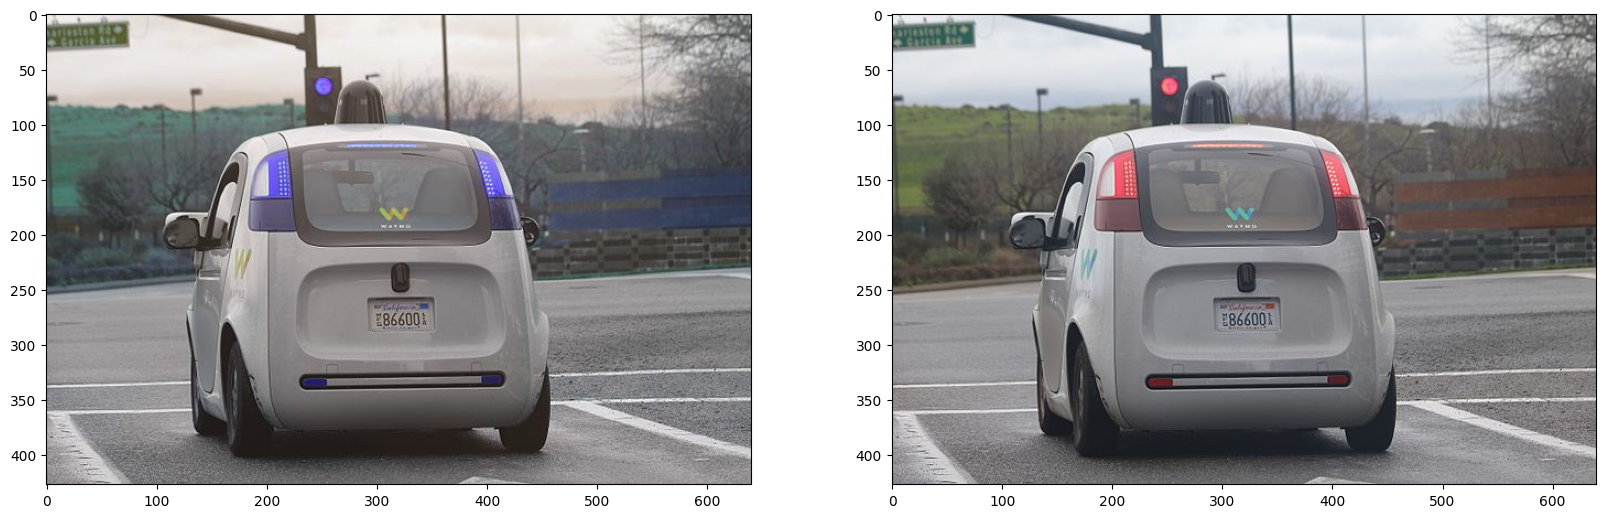

In [ ]:
# Read in the image
image = cv2.imread('DL_Data_sets/images/waymo_car.jpg')

# Print out the image dimensions
print('Image dimensions:', image.shape)

# Convert image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

f, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(image)
ax[1].imshow(image_rgb)
print('Image dimensions:', image_rgb.shape)

(427, 640)


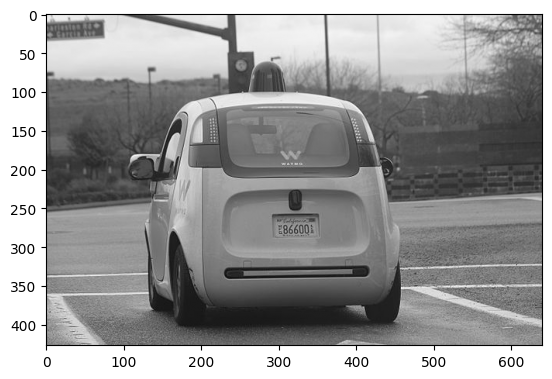

In [ ]:
# Change from color to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

print(gray_image.shape)
# plt.imshow(image_rgb)
plt.imshow(gray_image, cmap='gray')

OpenCV represents images as NumPy arrays. Conceptually, we can think of this representation as a matrix. In order to access a pixel value, we just need to supply the x and y coordinates of the pixel we are interested in.

In [ ]:
# Print specific grayscale pixel values
x = 400
y = 300

print("Color image values: Pixels are represented as a tuple")
print(image_rgb[y,x])
print(image_rgb[0][0:10])
print(image_rgb[0, 0:10])

print("\nGrayscale Image values: Pixels are represented as integers")
print(gray_image[y,x])
print(gray_image[0][0:10])
print(gray_image[0, 0:10])

Color image values: Pixels are represented as a tuple
[159 158 163]
[[237 237 239]
 [235 235 237]
 [236 236 238]
 [240 240 242]
 [238 238 240]
 [222 222 224]
 [191 191 193]
 [166 166 168]
 [219 219 221]
 [240 240 242]]
[[237 237 239]
 [235 235 237]
 [236 236 238]
 [240 240 242]
 [238 238 240]
 [222 222 224]
 [191 191 193]
 [166 166 168]
 [219 219 221]
 [240 240 242]]

Grayscale Image values: Pixels are represented as integers
160
[238 236 237 241 239 223 192 167 220 241]
[238 236 237 241 239 223 192 167 220 241]


In [ ]:
#Find the maximum and minimum grayscale values in this image

max_val = np.amax(gray_image)
min_val = np.amin(gray_image)

print('Max: ', max_val)
print('Min: ', min_val)

Max:  255
Min:  3


[[141 141 141 ... 126 125 125]
 [142 142 142 ... 126 126 126]
 [143 143 142 ... 127 127 126]
 ...
 [144 144 143 ... 134 135 135]
 [145 145 144 ... 137 137 137]
 [147 146 146 ... 140 140 140]]


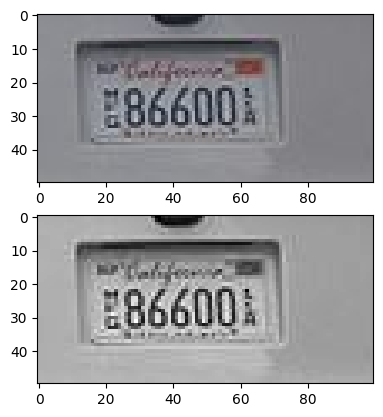

In [ ]:
# Display a specific part of the image

sub_image = gray_image[250:300, 280:380]
print(sub_image)

f, (color_ax, gray_ax) = plt.subplots(2, 1)

gray_ax.imshow(sub_image, cmap='gray')
color_ax.imshow(image_rgb[250:300, 280:380])

We can use array slices to change the color of a region of pixels. We will set a the region of the top left square to have a value of (0, 255, 0) (green).



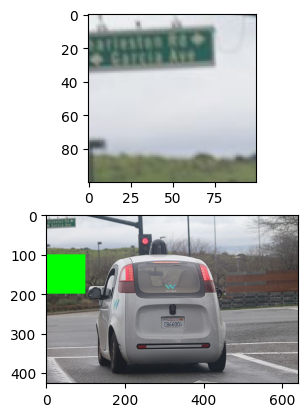

In [ ]:
image_replace = image_rgb.copy()

f, (corner_ax, image_replace_ax) = plt.subplots(2, 1)

top_corner = image_replace[0:100, 0:100]
corner_ax.imshow(top_corner)

image_replace[100:200, 0:100] = (0, 255, 0)

image_replace_ax.imshow(image_replace)

### Images from numpy arrays

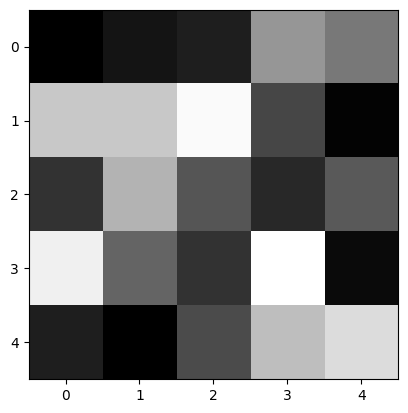

In [ ]:
# Create a 5x5 image using just grayscale, numerical values
tiny_image = np.array([[0, 20, 30, 150, 120],
                      [200, 200, 250, 70, 3],
                      [50, 180, 85, 40, 90],
                      [240, 100, 50, 255, 10],
                      [30, 0, 75, 190, 220]])

plt.imshow(tiny_image, cmap='gray')

# Challenge

Modify the following cell to produce the following image:

![Gradient](https://raw.githubusercontent.com/octavio-navarro/Computer-Vision/main/Notebooks/images/gradient.png)

### Challenge

Analyzing the image, I first thought that the solution was on decreasing the red value on each cell of the grid, but then I realized that this change darkened each cell until going to black. The solution I found, increases gradually the green and blue values achieving redscale tones

[[255  40  40]
 [255  91  91]
 [255 142 142]
 [255 193 193]
 [255 244 244]]


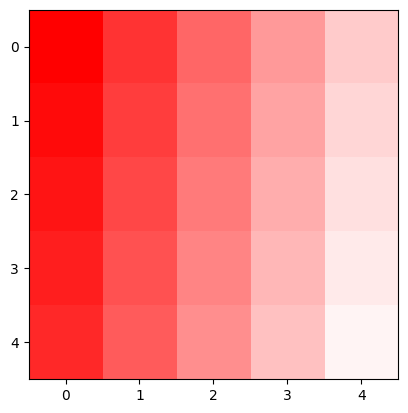

In [17]:
# This code displays an image where all the pixels are red. Modify it so that the pixels create a gradient to white.
gradient_size = 5
gradient = np.zeros((gradient_size, gradient_size, 3), dtype=np.uint8)


step_gradient = 0
cell_amount = gradient.shape[0]* gradient.shape[1]
increase_color_rate = 255/cell_amount

for x in range(gradient.shape[0]):
    for y in range(gradient.shape[1]):
        gradient[y, x] = (255, step_gradient, step_gradient)
        step_gradient += increase_color_rate # I increased x units of color on each iteration given by the cell amount of the matrix

print(gradient[-1])
plt.imshow(gradient, cmap='gray')